In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing

In [3]:
labels = ['summer', 'fall', 'winter','spring']

data_dir = 'gpsData/'
gps_lab = '.csv'

In [4]:
slip = np.linspace(-1e4,1e4,4)

33974
32376
33506
32695


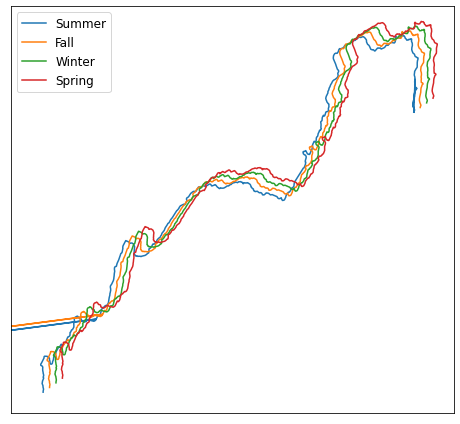

In [5]:
plt.figure(figsize=(6.5,6))

gps_data = []
for i in range(len(labels)):

    gps = pd.read_csv(data_dir+labels[i]+gps_lab)
    print(len(gps))
    gps_data += [gps]
    plt.plot(gps['lat']+slip[i],gps['lon']+slip[i],label=labels[i])
plt.xticks([])
plt.yticks([])
plt.grid('on')
plt.legend(['Summer', 'Fall', 'Winter', 'Spring'],loc='upper left',fontsize=12)
plt.axis([6300000, 6760000, 1000000, 1580000])
plt.tight_layout()

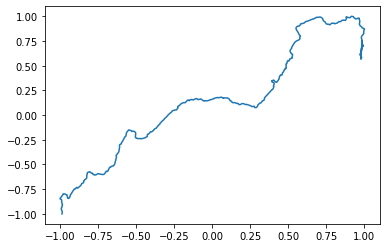

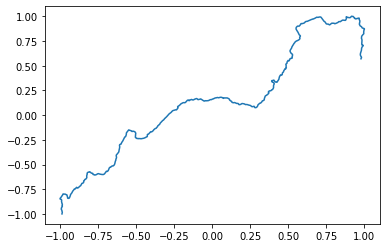

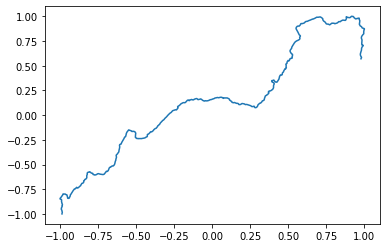

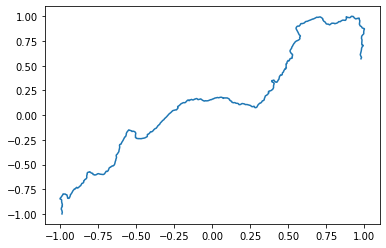

In [6]:
nimgs = 35768
gps_scaled = []

for i in range(4):
    x = np.zeros(nimgs)
    y = np.zeros(nimgs)
    x_tmp = tmp = gps_data[i]['lat'].values
    y_tmp = gps_data[i]['lon'].values
    x[:x_tmp.shape[0]] = x_tmp
    x[x_tmp.shape[0]:] = x_tmp[-1]
    y[:y_tmp.shape[0]] = y_tmp
    y[y_tmp.shape[0]:] = y_tmp[-1]
    if i == 0:
        x[7190]=x[7189]
        y[7190]=y[7189]
        scaler_x = preprocessing.MinMaxScaler(
            feature_range=(-1, +1)).fit(x.reshape(nimgs,1))
        scaler_y = preprocessing.MinMaxScaler(
            feature_range=(-1, +1)).fit(y.reshape(nimgs,1))
    if i == 1:
        x[7122]=x[7121]
        y[7122]=y[7121]
    x = scaler_x.transform(x.reshape(nimgs,1))
    y = scaler_y.transform(y.reshape(nimgs,1))
    gps_scaled += [np.append(x,y,1)]
    plt.plot(x,y)
    plt.pause(0.01)

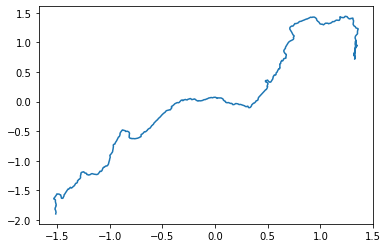

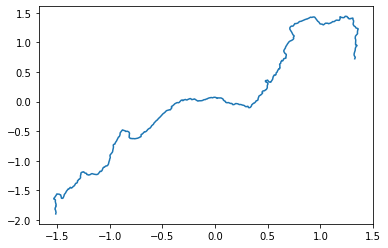

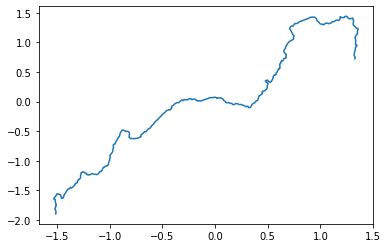

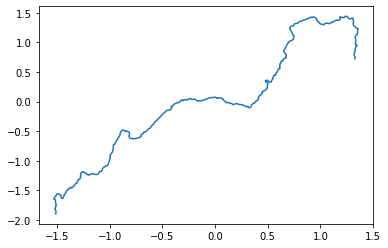

In [7]:
xy_scaled = []
for i in range(len(labels)):
    nimgs = len(gps_scaled[i])
    xy = gps_scaled[i]
    if i == 0:
        scaler = preprocessing.StandardScaler().fit(xy)
        
    xy_scaled = scaler.transform(xy)
    plt.plot(xy_scaled[:,0],xy_scaled[:,1])
    plt.pause(0.01)